# Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [14]:
missing_values = ["n/a", "na", "--", " ", "N/A", "NA","unknown"]

df = pd.read_csv('smartphones.csv', na_values=missing_values)
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [15]:
baris,kolom = df.shape
print('baris:', baris)
print('kolom:', kolom)

baris: 1020
kolom: 11


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [17]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

# Preprocessing & Cleaning

In [20]:
# hapus fitur yang tidak perlu
df.drop(['rating','display','card','price'], axis=1, inplace=True)

In [21]:
# hapus missing value
df.dropna(inplace=True)

In [22]:
df.sample(3)

,model,sim,processor,ram,battery,camera,os
659,OnePlus Nord 5,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9200, Octa Core Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 120W Fast Charging,64 MP + 12 MP + 5 MP Triple Rear & 32 MP Front...,No FM Radio
122,Google Pixel 6A,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor, Octa Core Processor","6 GB RAM, 128 GB inbuilt",4410 mAh Battery with Fast Charging,12.2 MP + 12 MP Dual Rear & 8 MP Front Camera,Android v12
214,Lava Blaze 5G,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 700 5G, Octa Core, 2.2 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery,50 MP + 2 MP Triple Rear & 8 MP Front Camera,Android v12


In [23]:
# encoding kategori dengan scikit-learn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [24]:
df['sim'] = label.fit_transform(df['sim'])
df['processor'] = label.fit_transform(df['processor'])
df['ram'] = label.fit_transform(df['ram'])
df['battery'] = label.fit_transform(df['battery'])
df['camera'] = label.fit_transform(df['camera'])
df['os'] = label.fit_transform(df['os'])

In [25]:
df.head(3)

,model,sim,processor,ram,battery,camera,os
0,OnePlus 11 5G,8,239,3,172,174,9
1,OnePlus Nord CE 2 Lite 5G,6,219,32,184,233,7
2,Samsung Galaxy A14 5G,6,69,26,176,160,9


In [26]:
# standar scaller
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
df[['sim','processor','ram','battery','camera','os']] = scaler.fit_transform(df[['sim','processor','ram','battery','camera','os']])

In [29]:
df.head(3)

,model,sim,processor,ram,battery,camera,os
0,OnePlus 11 5G,-0.452628,1.199319,-2.306589,0.366589,0.289860,-0.446071
1,OnePlus Nord CE 2 Lite 5G,-1.146266,0.954565,0.381167,0.579927,0.996125,-0.589081
2,Samsung Galaxy A14 5G,-1.146266,-0.881090,-0.174921,0.437701,0.122272,-0.446071


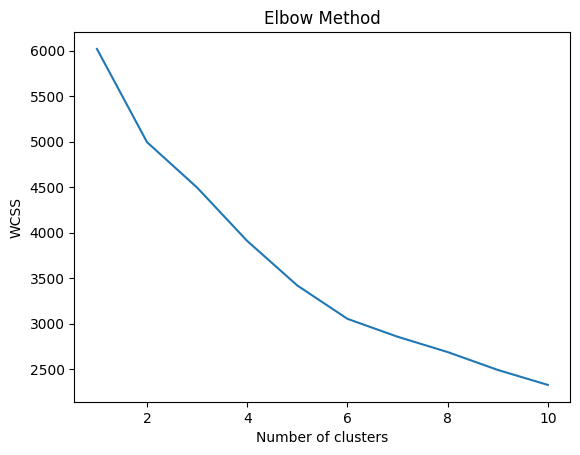

In [33]:
# cek cluster yang optimal dengan elbow method dan silhouette score
from sklearn.cluster import KMeans

X = df[['sim','processor','ram','battery','camera','os']]
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [35]:
# implementasi kmeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['cluster'] = y_kmeans
df.head(3)

,model,sim,processor,ram,battery,camera,os,cluster
0,OnePlus 11 5G,-0.452628,1.199319,-2.306589,0.366589,0.289860,-0.446071,1
1,OnePlus Nord CE 2 Lite 5G,-1.146266,0.954565,0.381167,0.579927,0.996125,-0.589081,1
2,Samsung Galaxy A14 5G,-1.146266,-0.881090,-0.174921,0.437701,0.122272,-0.446071,1


/home/limitmax/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


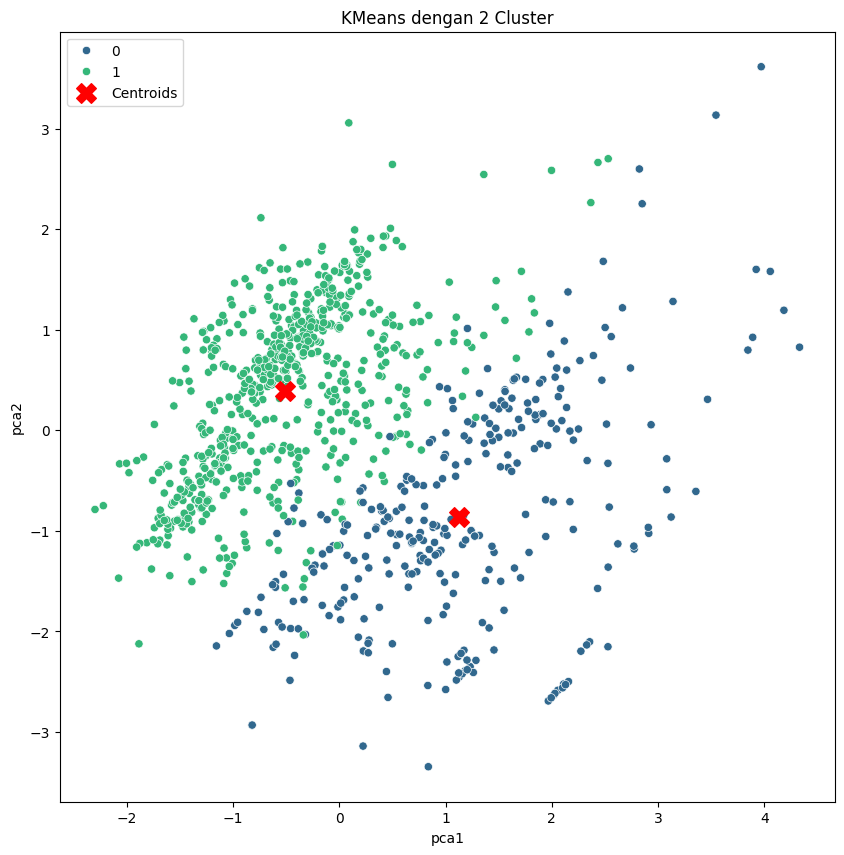

In [38]:
# visualisasi hasil cluster dengan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['pca1','pca2'])
df_pca['cluster'] = y_kmeans

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_
centroid_pca = pca.transform(centroids)
centroid_df = pd.DataFrame(centroid_pca, columns=['pca1', 'pca2'])

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='cluster', palette='viridis')
plt.scatter(centroid_df['pca1'], centroid_df['pca2'], marker='X', s=200, c='red', label='Centroids') # Menampilkan centroid
plt.title('KMeans dengan 2 Cluster')
plt.legend()
plt.show()
